# Python Lab 04b: PCA and k-Means (Toy Examples)

## Francesco Della Santa, Computational Linear Algebra for Large Scale Problems, Politecnico di Torino


In [1]:
# ***** ATTENTION! *****
# If you want that the "%matplotlib widget" works, you need the package ipympl (pip install ipympl)
#
#
# MATPLOTLIB INTERACTIVE VISUALIZATION. REMOVE (OR COMMENT) IF YOU NEED TO PRINT THE NOTEBOOK AS A PDF, SOMETIMES IT DOES NOT WORK WELL...
%matplotlib widget
#
#
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display

random_state = 42

# Loading Iris and Wine Datasets Available in Scikit-Learn

Look at  https://scikit-learn.org/stable/modules/classes.html?highlight=datasets#module-sklearn.datasets for more information about toy-datasets available Scikit-Learn.

We are going to work with the "iris" and the "wine" datasets.

**Exercise:** read the documentation of *datasets.load_iris* and *datasets.load_wine* (link above) to understand the content.

In [2]:
iris_dataset = datasets.load_iris(as_frame=True)
wine_dataset = datasets.load_wine(as_frame=True)

iris = pd.concat([iris_dataset['data'], iris_dataset['target']], axis=1)
wine = pd.concat([wine_dataset['data'], wine_dataset['target']], axis=1)

display(iris)
print(iris_dataset['DESCR'])
print('')
print('*************')
print('')
display(wine)
print(wine_dataset['DESCR'])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

### Observations:
1. Iris dataset has all the features measured in centimeters and with value ranges of the same order of magnitude;
1. Wine dataset has many different features, described by different unit measures and with value ranges chracterized by different oreders of magnitude

**Consequences:** 
1. We can use PCA directly on the iris data without preprocessing;
1. For the Wine dataset it is better to standardize the data before applying the PCA.

**N.B.:** We show all the PCs, without dimensionality reduction, as a preliminary analysis of the datasets and the variance distribution among PCs. Moreover, we look also at the PCA applied to non-standardized wine dataset.

c:\Users\marco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


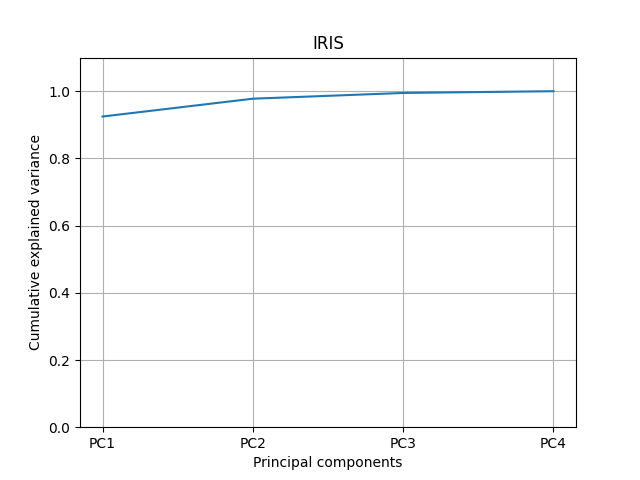

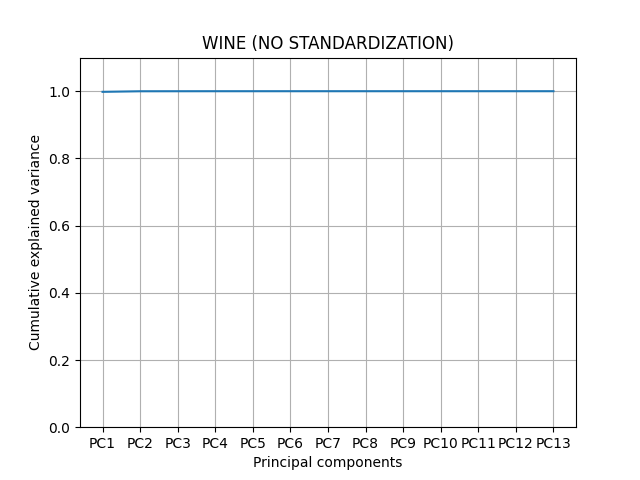

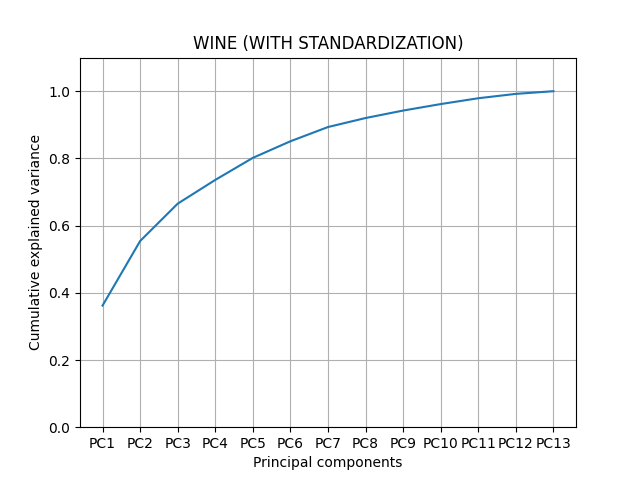

In [3]:
X_iris = iris.iloc[:, :-1]  # I do not consider the target column
X_wine = wine.iloc[:, :-1]  # I do not consider the target column

scaler_wine = StandardScaler()
scaler_wine.fit(X_wine.values)

X_wine_scaled = scaler_wine.transform(X_wine.values)

pca_iris = PCA()
pca_wine = PCA()
pca_wine_nostd = PCA()

pca_iris.fit(X_iris.values)
pca_wine.fit(X_wine_scaled)
pca_wine_nostd.fit(X_wine.values)

# HELP:
# np.cumsum: numpy function that compute the cumulative sum of the input array
# np.insert: numpy function that insert a value inside a vector in a specified position
#
# EXERCISE: read the documentation od the numpy functions above and of the following matplotlib functions
# 

plt.figure()
plt.plot(np.cumsum(pca_iris.explained_variance_ratio_))
plt.title('IRIS')
plt.ylim([0, 1.1])
plt.xticks(ticks=np.arange(pca_iris.n_features_), 
           labels=[f'PC{i + 1}' for i in range(pca_iris.n_features_)])
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()

plt.figure()
plt.plot(np.cumsum(pca_wine_nostd.explained_variance_ratio_))
plt.title('WINE (NO STANDARDIZATION)')
plt.ylim([0, 1.1])
plt.xticks(ticks=np.arange(pca_wine_nostd.n_features_), 
           labels=[f'PC{i + 1}' for i in range(pca_wine_nostd.n_features_)])
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()

plt.figure()
plt.plot(np.cumsum(pca_wine.explained_variance_ratio_))
plt.title('WINE (WITH STANDARDIZATION)')
plt.ylim([0, 1.1])
plt.xticks(ticks=np.arange(pca_wine.n_features_), 
           labels=[f'PC{i + 1}' for i in range(pca_wine.n_features_)])
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()


## Visualization

For this exercise, we arbitrarily select $m=2$ PCs for the iris dataset and $m=3$ PCs for the wine dataset. We oberve that the explained variance for the iris is almost $100\%$ of the total variance while the explained variance for the wine is approximately $70\%$ of the total variance.

In [4]:
pca_iris_m = PCA(n_components=2)
pca_wine_m = PCA(n_components=3)

pca_iris_m.fit(X_iris.values)
pca_wine_m.fit(X_wine_scaled)

Y_iris_m = pca_iris_m.transform(X_iris.values)
Y_wine_m = pca_wine_m.transform(X_wine_scaled)

### Score Graph

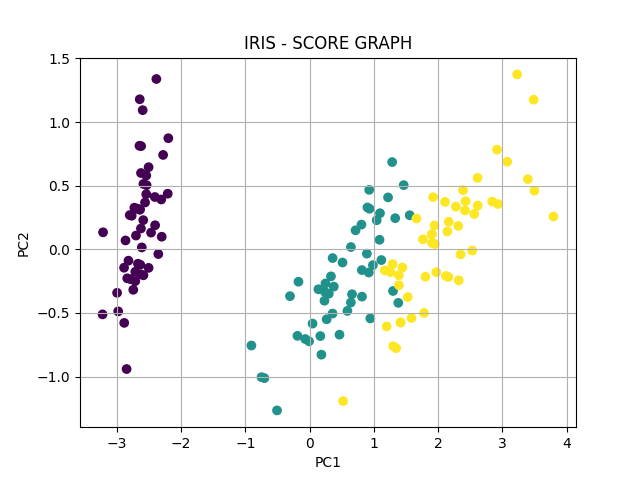

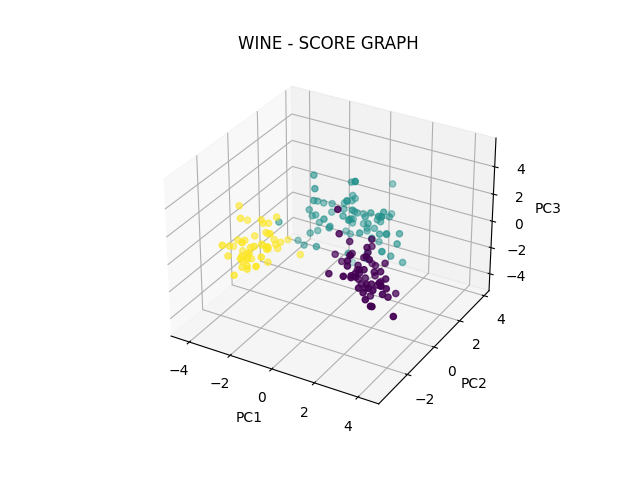

In [5]:
plt.figure()
plt.scatter(Y_iris_m[:, 0], Y_iris_m[:, 1], c=iris['target'].values)
plt.title('IRIS - SCORE GRAPH')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

# ATTENTION: for the 3D plots, always import Axes3D (from mpl_toolkits.mplot3d import Axes3D)

fig_winescore = plt.figure()
ax = fig_winescore.add_subplot(111, projection='3d')
ax.scatter(Y_wine_m[:, 0], Y_wine_m[:, 1], Y_wine_m[:, 2], c=wine['target'].values)
plt.title('WINE - SCORE GRAPH')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.grid()
plt.show()

### Loading Graph

c:\Users\marco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


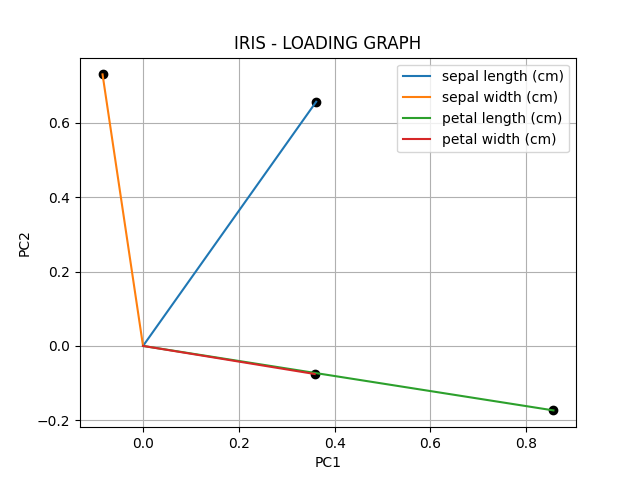

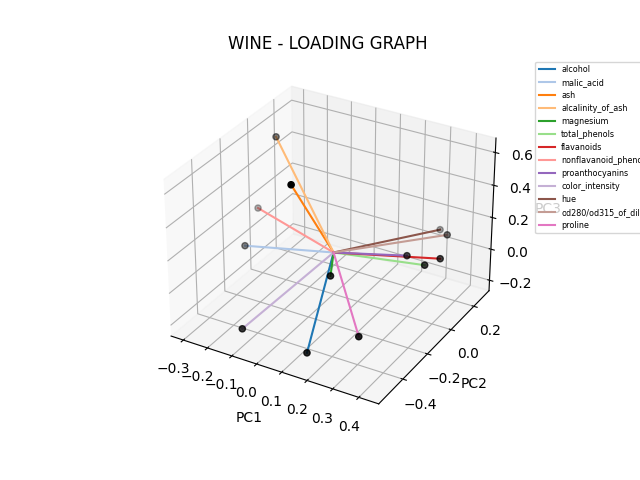

In [6]:
plt.figure()
for i in range(pca_iris_m.n_features_):
    plt.plot([0, pca_iris_m.components_[0, i]], [0, pca_iris_m.components_[1, i]], 
             label=X_iris.columns[i])
plt.scatter(pca_iris_m.components_[0, :], pca_iris_m.components_[1, :], c='k')
plt.legend()
plt.title('IRIS - LOADING GRAPH')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

# ATTENTION: for the 3D plots, always import Axes3D (from mpl_toolkits.mplot3d import Axes3D)

tab20 = cm.tab20.colors

fig_winescore = plt.figure()
ax = fig_winescore.add_subplot(111, projection='3d')
for i in range(pca_wine_m.n_features_):
    ax.plot([0, pca_wine_m.components_[0, i]], [0, pca_wine_m.components_[1, i]], 
            [0, pca_wine_m.components_[2, i]],
            label=X_wine.columns[i],
            color=tab20[i]
           )
ax.scatter(pca_wine_m.components_[0, :], pca_wine_m.components_[1, :], pca_wine_m.components_[2, :], c='k')
plt.legend(bbox_to_anchor=(1.05, 1), fontsize='xx-small')
plt.title('WINE - LOADING GRAPH')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.grid()
plt.show()


### Biplot

**Exercise:** combine the previous codes to make a Biplot of both the iris data and the wine data in the reduce PCs' space.

In [7]:
# ...

## PC Interpretation

Let's have a look at the contribute of the original features to the PCs. We help the interpretation using the barplots to represent the PCs.

Since for the iris dataset we are in $\mathbb{R}^2$ and the number of features is relatively small, we can also look at the loading graph to help the interpretation.

### Iris Dataset

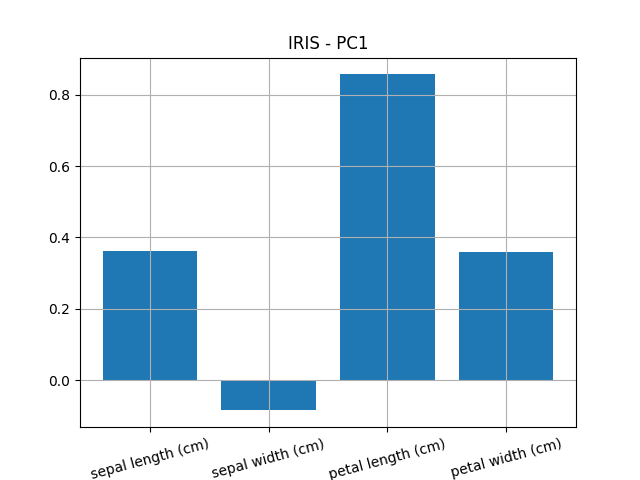

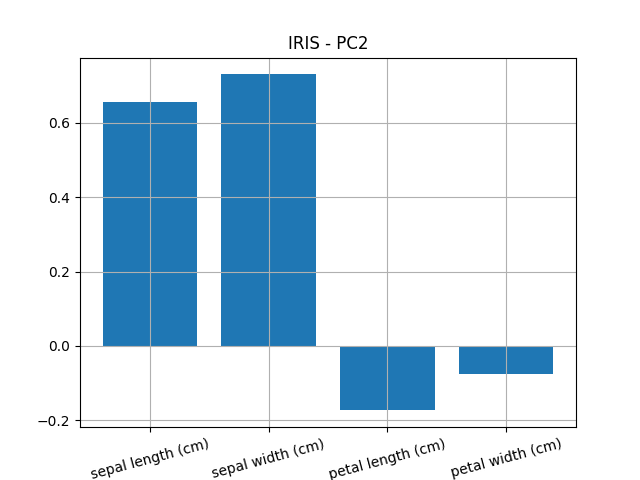

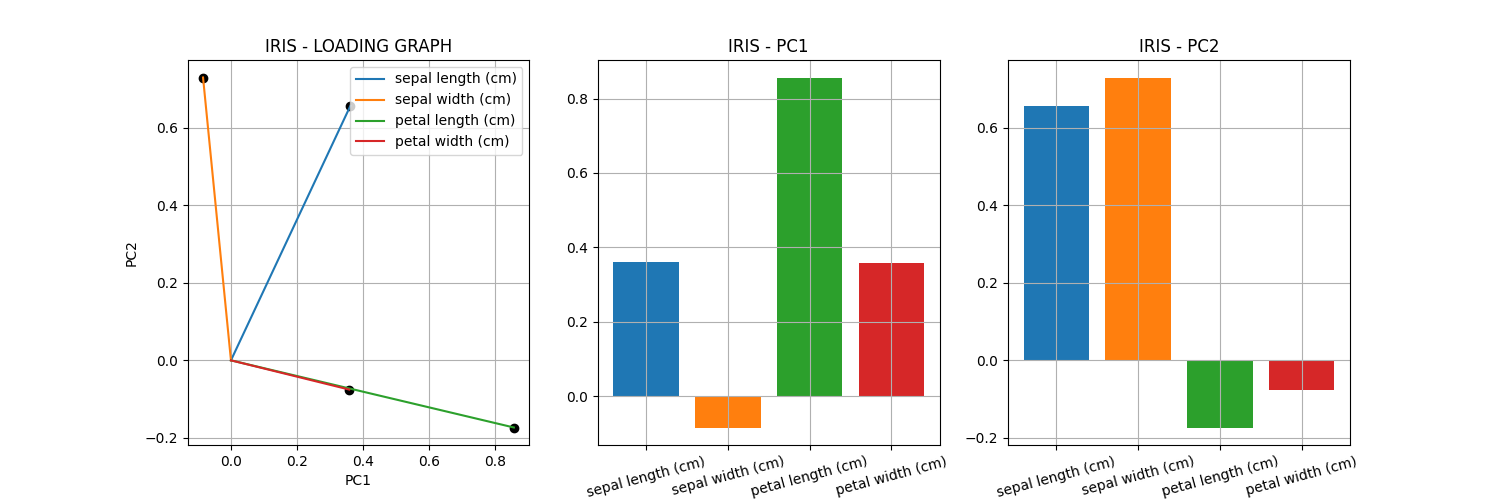

In [8]:
plt.figure()
plt.bar(np.arange(pca_iris_m.n_features_), pca_iris_m.components_[0, :])
plt.xticks(ticks=np.arange(pca_iris_m.n_features_), 
           labels=X_iris.columns.to_list(),
           rotation=15)
plt.title('IRIS - PC1')
plt.grid()
plt.show()

plt.figure()
plt.bar(np.arange(pca_iris_m.n_features_), pca_iris_m.components_[1, :])
plt.xticks(ticks=np.arange(pca_iris_m.n_features_), 
           labels=X_iris.columns.to_list(),
           rotation=15)
plt.title('IRIS - PC2')
plt.grid()
plt.show()


tab10 = cm.tab10.colors

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i in range(pca_iris_m.n_features_):
    ax[0].plot([0, pca_iris_m.components_[0, i]], [0, pca_iris_m.components_[1, i]], 
               label=X_iris.columns[i])
ax[0].scatter(pca_iris_m.components_[0, :], pca_iris_m.components_[1, :], c='k')
ax[0].legend()
ax[0].set_title('IRIS - LOADING GRAPH')
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].grid(visible=True, which='both')

ax[1].bar(np.arange(pca_iris_m.n_features_), pca_iris_m.components_[0, :], color=tab10[:4])
ax[1].set_xticks(ticks=np.arange(pca_iris_m.n_features_), 
           labels=X_iris.columns.to_list(),
           rotation=15)
ax[1].set_title('IRIS - PC1')
ax[1].grid(visible=True, which='both')

ax[2].bar(np.arange(pca_iris_m.n_features_), pca_iris_m.components_[1, :], color=tab10[:4])
ax[2].set_xticks(ticks=np.arange(pca_iris_m.n_features_), 
           labels=X_iris.columns.to_list(),
           rotation=15)
ax[2].set_title('IRIS - PC2')
ax[2].grid(visible=True, which='both')

plt.show()


#### Giving a Name to the Iris' PCs

Looking at the barplots above, we can assign (**e.g.**) the following names to the PCs computed for the iris dataset:
1. PC1: "Petal Size & Sepal Length";
1. PC2: "Sepal Size".

### Wine Dataset

Increasing the number $n$ of features, the barplot interpratation becomes more complicated. Then, *an heuristic idea*, can be the following.

**IDEA (HEURISTIC):** for each PC, we consider only the the features with a contribute greater than an arbitrary threshold $\epsilon$; i.e., only the features that have an absolute value greater than $\epsilon$ for the PC. 

Since the PC are versors (i.e., they have norm equal to one), an *example* of possible threshold value is
$$\epsilon = \sqrt{\frac{1}{n}}\,,$$
since $||[\epsilon, \ldots ,\epsilon]^\top||=1$.

**OTHER OPTIONS:** e.g., select the top $x\%$ of original features with largest abosulte value, for each PC. In general, the importat thing is that any method is well-founded on right assumptions and/or hypotheses.

Since we have a 3-dimensional PC-space, we can still use the loading graph to help the interpretation.

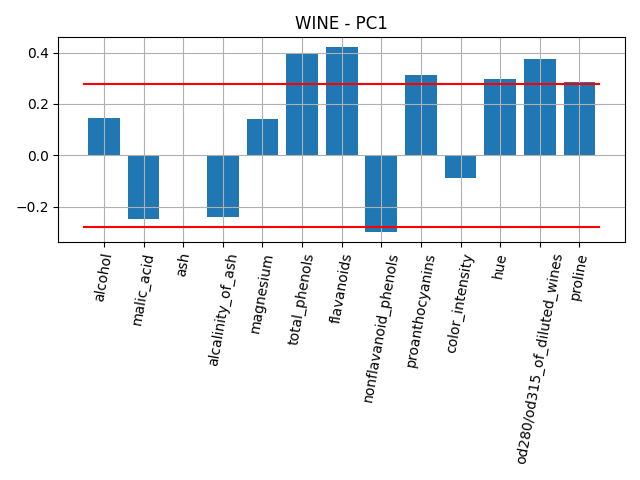

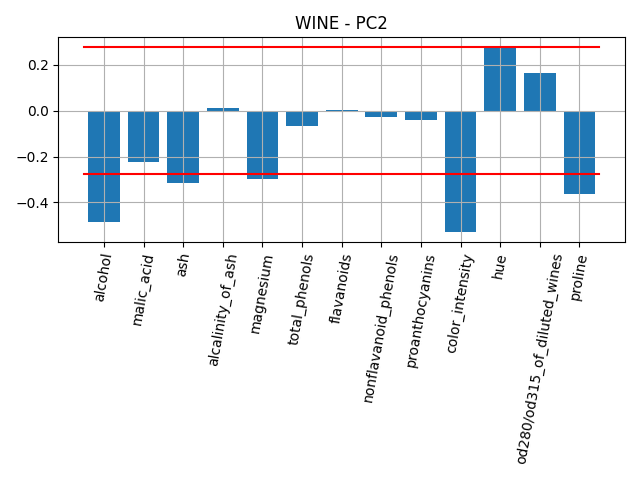

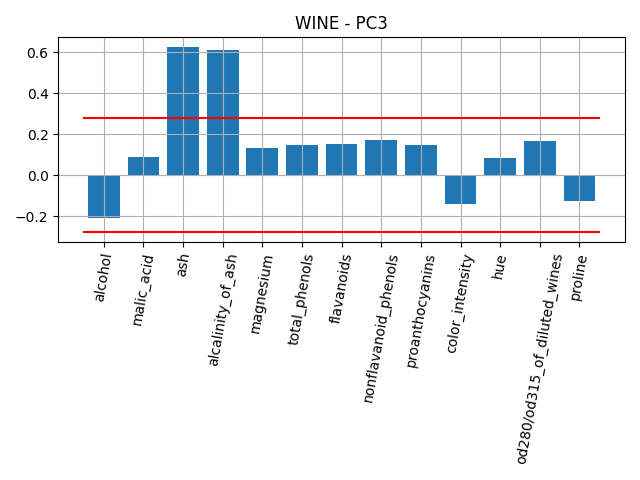

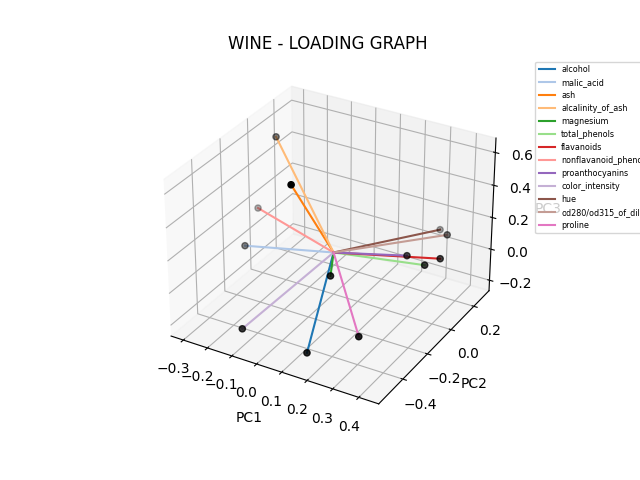


****************** PC1 **********************
HIGH-VALUED POSITIVE COMPONENTS: ['total_phenols', 'flavanoids', 'proanthocyanins', 'hue', 'od280/od315_of_diluted_wines', 'proline']

HIGH-VALUED NEGATIVE COMPONENTS: ['nonflavanoid_phenols']
*********************************************


****************** PC2 **********************
HIGH-VALUED POSITIVE COMPONENTS: ['hue']

HIGH-VALUED NEGATIVE COMPONENTS: ['alcohol', 'ash', 'magnesium', 'color_intensity', 'proline']
*********************************************


****************** PC3 **********************
HIGH-VALUED POSITIVE COMPONENTS: ['ash', 'alcalinity_of_ash']

HIGH-VALUED NEGATIVE COMPONENTS: []
*********************************************



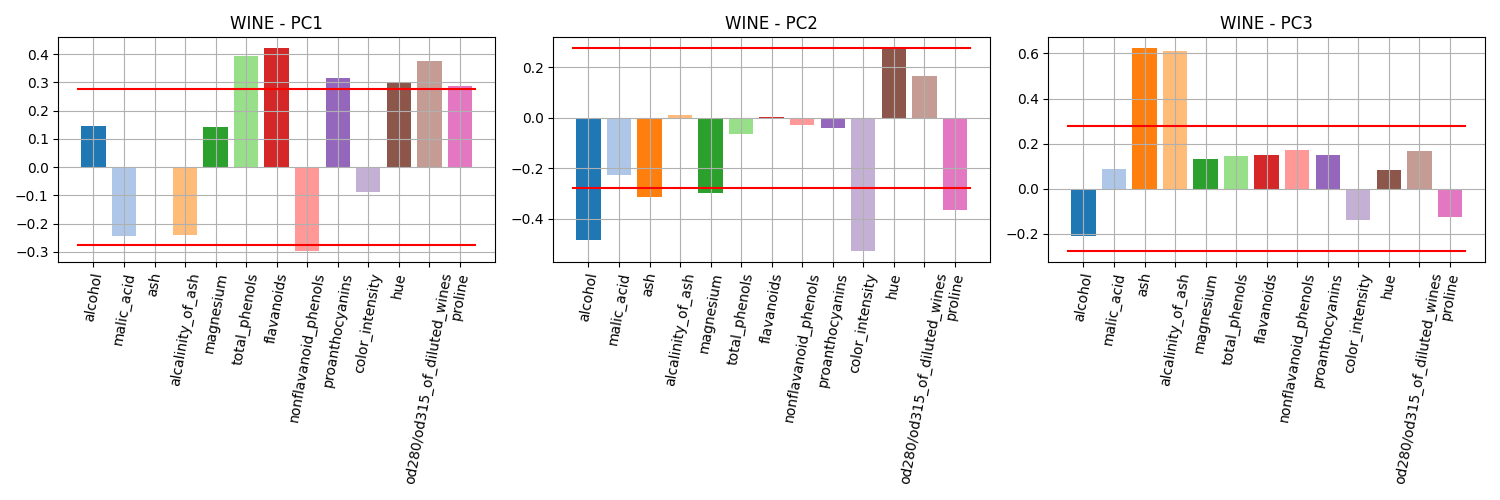

In [9]:
# Defining the threshold value
eps = np.sqrt(1 / pca_wine_m.n_features_)

plt.figure()
plt.bar(np.arange(pca_wine_m.n_features_), pca_wine_m.components_[0, :])
# --- RED LINE DENOTING THE THRESHOLD [-eps, +eps] -----------------
plt.plot([-0.5, pca_wine_m.n_features_ - 0.5], [eps, eps], 'red')
plt.plot([-0.5, pca_wine_m.n_features_ - 0.5], [-eps, -eps], 'red')
# ------------------------------------------------------------------
plt.xticks(ticks=np.arange(pca_wine_m.n_features_), 
           labels=X_wine.columns.to_list(),
           rotation=80)
plt.title('WINE - PC1')
plt.grid()
plt.tight_layout()
plt.show()

plt.figure()
plt.bar(np.arange(pca_wine_m.n_features_), pca_wine_m.components_[1, :])
# --- RED LINE DENOTING THE THRESHOLD [-eps, +eps] -----------------
plt.plot([-0.5, pca_wine_m.n_features_ - 0.5], [eps, eps], 'red')
plt.plot([-0.5, pca_wine_m.n_features_ - 0.5], [-eps, -eps], 'red')
# ------------------------------------------------------------------
plt.xticks(ticks=np.arange(pca_wine_m.n_features_), 
           labels=X_wine.columns.to_list(),
           rotation=80)
plt.title('WINE - PC2')
plt.grid()
plt.tight_layout()
plt.show()

plt.figure()
plt.bar(np.arange(pca_wine_m.n_features_), pca_wine_m.components_[2, :])
# --- RED LINE DENOTING THE THRESHOLD [-eps, +eps] -----------------
plt.plot([-0.5, pca_wine_m.n_features_ - 0.5], [eps, eps], 'red')
plt.plot([-0.5, pca_wine_m.n_features_ - 0.5], [-eps, -eps], 'red')
# ------------------------------------------------------------------
plt.xticks(ticks=np.arange(pca_wine_m.n_features_), 
           labels=X_wine.columns.to_list(),
           rotation=80)
plt.title('WINE - PC3')
plt.grid()
plt.tight_layout()
plt.show()


fig_winescore = plt.figure()
ax = fig_winescore.add_subplot(111, projection='3d')
for i in range(pca_wine_m.n_features_):
    ax.plot([0, pca_wine_m.components_[0, i]], [0, pca_wine_m.components_[1, i]], 
            [0, pca_wine_m.components_[2, i]],
            label=X_wine.columns[i],
            color=tab20[i]
           )
ax.scatter(pca_wine_m.components_[0, :], pca_wine_m.components_[1, :], pca_wine_m.components_[2, :], c='k')
plt.legend(bbox_to_anchor=(1.05, 1), fontsize='xx-small')
plt.title('WINE - LOADING GRAPH')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.grid()
plt.show()



fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].bar(np.arange(pca_wine_m.n_features_), pca_wine_m.components_[0, :], color=tab20[:pca_wine_m.n_features_])
# --- RED LINE DENOTING THE THRESHOLD [-eps, +eps] -----------------
ax[0].plot([-0.5, pca_wine_m.n_features_ - 0.5], [eps, eps], 'red')
ax[0].plot([-0.5, pca_wine_m.n_features_ - 0.5], [-eps, -eps], 'red')
# ------------------------------------------------------------------
ax[0].set_xticks(ticks=np.arange(pca_wine_m.n_features_), 
           labels=X_wine.columns.to_list(),
           rotation=80)
ax[0].set_title('WINE - PC1')
ax[0].grid(visible=True, which='both')
ax[1].bar(np.arange(pca_wine_m.n_features_), pca_wine_m.components_[1, :], color=tab20[:pca_wine_m.n_features_])
# --- RED LINE DENOTING THE THRESHOLD [-eps, +eps] -----------------
ax[1].plot([-0.5, pca_wine_m.n_features_ - 0.5], [eps, eps], 'red')
ax[1].plot([-0.5, pca_wine_m.n_features_ - 0.5], [-eps, -eps], 'red')
# ------------------------------------------------------------------
ax[1].set_xticks(ticks=np.arange(pca_wine_m.n_features_), 
           labels=X_wine.columns.to_list(),
           rotation=80)
ax[1].set_title('WINE - PC2')
ax[1].grid(visible=True, which='both')
ax[2].bar(np.arange(pca_wine_m.n_features_), pca_wine_m.components_[2, :], color=tab20[:pca_wine_m.n_features_])
# --- RED LINE DENOTING THE THRESHOLD [-eps, +eps] -----------------
ax[2].plot([-0.5, pca_wine_m.n_features_ - 0.5], [eps, eps], 'red')
ax[2].plot([-0.5, pca_wine_m.n_features_ - 0.5], [-eps, -eps], 'red')
# ------------------------------------------------------------------
ax[2].set_xticks(ticks=np.arange(pca_wine_m.n_features_), 
           labels=X_wine.columns.to_list(),
           rotation=80)
ax[2].set_title('WINE - PC3')
ax[2].grid(visible=True, which='both')
plt.tight_layout()





for ii in range(3):
    ind_great_pos_PCii = np.argwhere(pca_wine_m.components_[ii, :] >= eps).flatten()
    ind_great_neg_PCii = np.argwhere(pca_wine_m.components_[ii, :] <= -eps).flatten()
    
    great_pos_PCii = [X_wine.columns[i] for i in ind_great_pos_PCii]
    great_neg_PCii = [X_wine.columns[i] for i in ind_great_neg_PCii]
    
    print('')
    print(f'****************** PC{ii+1} **********************')
    print(f'HIGH-VALUED POSITIVE COMPONENTS: {great_pos_PCii}')
    print('')
    print(f'HIGH-VALUED NEGATIVE COMPONENTS: {great_neg_PCii}')
    print('*********************************************')
    print('')

#### Giving a Name to the Wine's PCs

Looking at the barplots and the features printed above, we can assign names to the PCS. For this dataset, we need at least some knowledge about wines to be really able to give a good interpretation of the PCs. 
Then, the names given to the PCs can be something of this type:
1. PC1: "*Earthy Profile* (-) VS *Rich Blend* (+)"; 
1. PC2: "*Robust & Deep* (-) VS Hue (+)";
1. PC3: "Ash & Alcalinity of Ash".

We higlighted in *italic* the PCs named useing knowledge about wines.

# $k$-Means

We now apply the $k$-Means algorithm w.r.t. the data reduced through the PCA. Then, we show the barplot of the centroids w.r.t. the PCs, trying to give an interpretation to them.

c:\Users\marco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\marco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


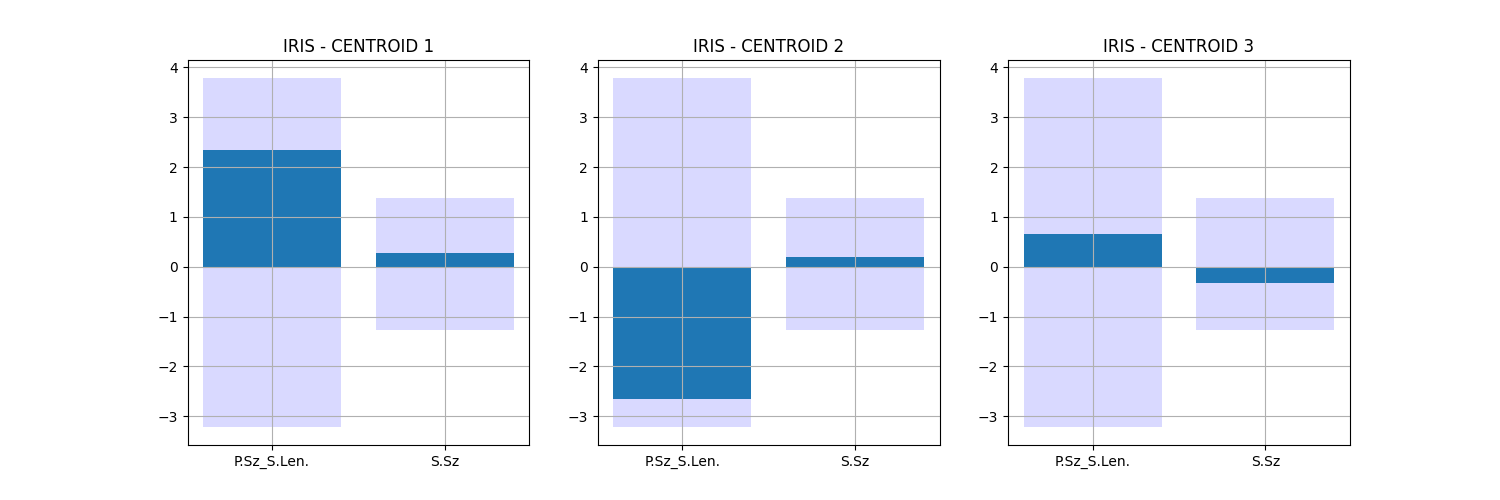

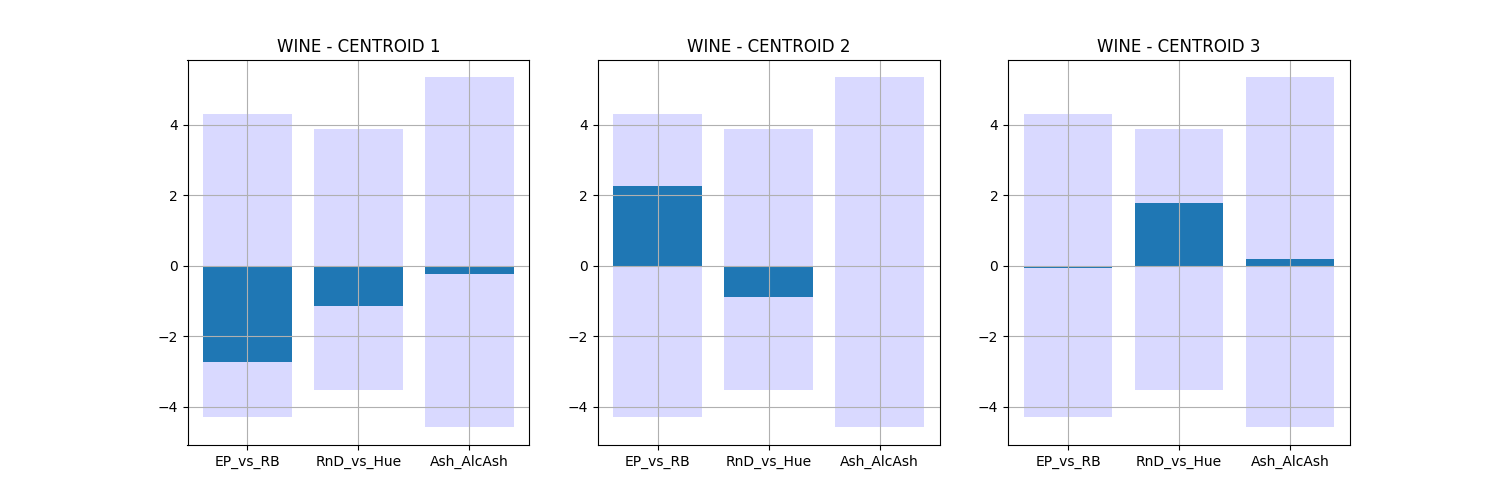

In [10]:
km_iris = KMeans(n_clusters=3, random_state=random_state)
km_wine = KMeans(n_clusters=3, random_state=random_state)

km_iris.fit(Y_iris_m)
km_wine.fit(Y_wine_m)

maxs_iris_m = Y_iris_m.max(axis=0) 
mins_iris_m = Y_iris_m.min(axis=0) 

maxs_wine_m = Y_wine_m.max(axis=0) 
mins_wine_m = Y_wine_m.min(axis=0) 

irisPC1 = "P.Sz_S.Len."
irisPC2 = "S.Sz"

winePC1 = "EP_vs_RB"
winePC2 = "RnD_vs_Hue"
winePC3 = "Ash_AlcAsh"

fig_iris, ax_iris = plt.subplots(1, 3, figsize=(15, 5))
for ii in range(3):
    ax_iris[ii].bar(np.arange(km_iris.cluster_centers_.shape[1]), maxs_iris_m, color='blue', alpha=0.15)
    ax_iris[ii].bar(np.arange(km_iris.cluster_centers_.shape[1]), mins_iris_m, color='blue', alpha=0.15)
    ax_iris[ii].bar(np.arange(km_iris.cluster_centers_.shape[1]), km_iris.cluster_centers_[ii, :])
    ax_iris[ii].set_xticks(ticks=np.arange(km_iris.cluster_centers_.shape[1]))
    ax_iris[ii].set_xticklabels(labels=[irisPC1, irisPC2], rotation=0)
    ax_iris[ii].grid(visible=True, which='both')
    ax_iris[ii].set_title(f'IRIS - CENTROID {ii+1}')


fig_wine, ax_wine = plt.subplots(1, 3, figsize=(15, 5))
for ii in range(3):
    ax_wine[ii].bar(np.arange(km_wine.cluster_centers_.shape[1]), maxs_wine_m, color='blue', alpha=0.15)
    ax_wine[ii].bar(np.arange(km_wine.cluster_centers_.shape[1]), mins_wine_m, color='blue', alpha=0.15)
    ax_wine[ii].bar(np.arange(km_wine.cluster_centers_.shape[1]), km_wine.cluster_centers_[ii, :])
    ax_wine[ii].set_xticks(ticks=np.arange(km_wine.cluster_centers_.shape[1]))
    ax_wine[ii].set_xticklabels(labels=[winePC1, winePC2, winePC3], rotation=0)
    ax_wine[ii].grid(visible=True, which='both')
    ax_wine[ii].set_title(f'WINE - CENTROID {ii+1}')
    



In [11]:
km_wine.cluster_centers_

array([[-2.72003575e+00, -1.12565126e+00, -2.39093241e-01],
       [ 2.27580813e+00, -8.94517592e-01, -2.15032202e-03],
       [-7.27201401e-02,  1.77754410e+00,  1.92644149e-01]])

#### Giving a Name to the Centroids

Looking at the barplots (the PC-coordinates of the centroids) printed above, we can assign names or brief descriptions to the clusters corresponding to the centroids.

IRIS:
1. Cluster 1: "Irises with large petals and long sepals"; 
1. Cluster 2: "Irises with small petals and short sepals";
1. Cluster 3: "Ireses in-the-average";

WINE:
1. Cluster 1: "Earthy, robust, and deep wines";
2. Cluster 2: "Robust and deep wines with rich blend";
3. Cluster 3: "Strongly-hued wines".

## Score Graphs, Clusters, and Centroids

In [12]:
km_iris.labels_ 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

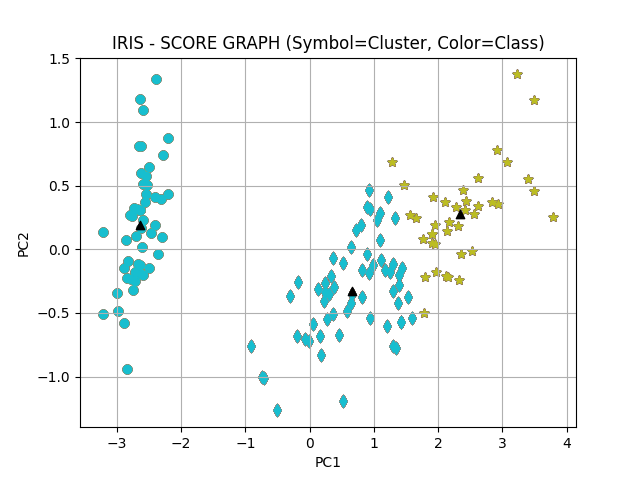

C:\Users\marco\AppData\Local\Temp\ipykernel_17524\2284188791.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig_winescore = plt.figure()


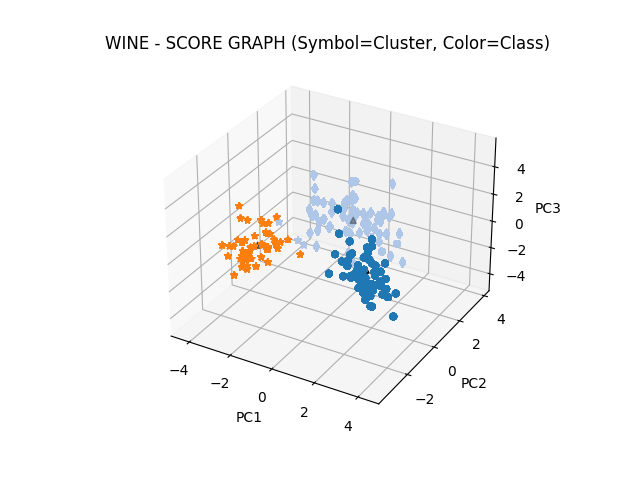

In [14]:
markers_dict = {0: '*', 1: 'o', 2: 'd'}
colors = cm.tab20.colors

plt.figure()
for ll in km_iris.labels_:
    plt.scatter(Y_iris_m[km_iris.labels_ == ll, 0], Y_iris_m[km_iris.labels_ == ll, 1], c=[colors[ii] for ii in iris['target'].values[km_iris.labels_ == ll]], marker=markers_dict[ll])
plt.scatter(km_iris.cluster_centers_[:, 0], km_iris.cluster_centers_[:, 1], c='black', marker='^')
plt.title('IRIS - SCORE GRAPH (Symbol=Cluster, Color=Class)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

fig_winescore = plt.figure()
ax = fig_winescore.add_subplot(111, projection='3d')
for ll in km_iris.labels_:
    ax.scatter(Y_wine_m[km_wine.labels_ == ll, 0], Y_wine_m[km_wine.labels_ == ll, 1], Y_wine_m[km_wine.labels_ == ll, 2], c=[colors[ii] for ii in wine['target'].values[km_wine.labels_ == ll]], marker=markers_dict[ll])
ax.scatter(km_wine.cluster_centers_[:, 0], km_wine.cluster_centers_[:, 1], km_wine.cluster_centers_[:, 2], c='black', marker='^')
plt.title('WINE - SCORE GRAPH (Symbol=Cluster, Color=Class)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.grid()
plt.show()